## Observations and Insights 

In [199]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice = len(combined_data.groupby(["Mouse ID"]))
print(f"Total number of mice: {total_mice}")

Total number of mice: 249


In [79]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_groupby = combined_data.groupby(["Mouse ID", "Timepoint"])["Timepoint"].agg(['count'])
duplicates = combined_groupby.loc[combined_groupby['count'] > 1].reset_index()
duplicates.head(100)

,Mouse ID,Timepoint,count
0,g989,0,2
1,g989,5,2
2,g989,10,2
3,g989,15,2
4,g989,20,2


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = duplicates["Mouse ID"].unique()
dup_timepoint = duplicates["Timepoint"].unique()

all_data_duplicate = combined_data.loc[combined_data["Mouse ID"].isin(dup_mouse_id) & combined_data["Timepoint"].isin(dup_timepoint)]
all_data_duplicate.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=False)
data_cleaned.head(3)

In [82]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of duplicate mice: {len(duplicates)}")
print(f"Number of mice in the original DataFrame: {len(combined_data)}")
print(f"Number of mice in the cleaned DataFrame: {len(data_cleaned)}")

Number of duplicate mice: 5
Number of mice in the original DataFrame: 1893
Number of mice in the cleaned DataFrame: 1888


## Summary Statistics

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_stat = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].mean()
median_stat = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].median()
var_stat = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].var()
std_stat = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].std()
sem_stat = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "mean": mean_stat,
    "median": median_stat,
    "var": var_stat,
    "std": std_stat,
    "sem": sem_stat
})

summary_df.head()

mean     median        var       std       sem
Drug Regimen Timepoint                                                     
Capomulin    0          45.000000  45.000000   0.000000  0.000000  0.000000
             5          44.266086  45.597064   5.030889  2.242964  0.448593
             10         43.084291  43.421014  12.344133  3.513422  0.702684
             15         42.064317  42.798160  16.878693  4.108369  0.838617
             20         40.716325  40.716428  19.035028  4.362915  0.909731

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_sts = data_cleaned.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_sts.head()

mean     median        var       std       sem
Drug Regimen Timepoint                                                     
Capomulin    0          45.000000  45.000000   0.000000  0.000000  0.000000
             5          44.266086  45.597064   5.030889  2.242964  0.448593
             10         43.084291  43.421014  12.344133  3.513422  0.702684
             15         42.064317  42.798160  16.878693  4.108369  0.838617
             20         40.716325  40.716428  19.035028  4.362915  0.909731

## Bar and Pie Charts

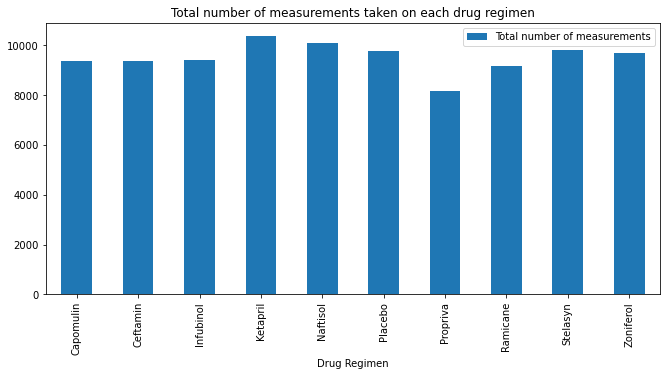

In [169]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sum().reset_index()
measurements = measurements.rename(columns={"Tumor Volume (mm3)":"Total number of measurements"})

title = "Total number of measurements taken on each drug regimen"
measurements.plot(kind="bar", x="Drug Regimen", y="Total number of measurements", figsize=(11,5), title=title)


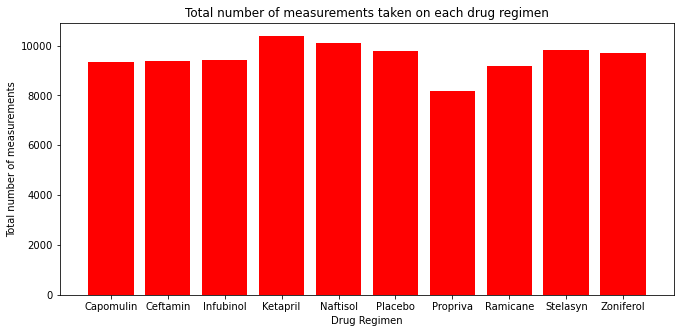

In [171]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.figure(figsize=(11, 5))
plt.title("Total number of measurements taken on each drug regimen")
plt.bar(measurements["Drug Regimen"], measurements["Total number of measurements"], color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements")
plt.show()

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_cleaned_by_id = combined_data.drop_duplicates(subset=["Mouse ID"], keep='first', inplace=False)

grouped_by_id = data_cleaned_by_id.groupby(["Sex"])["Sex"].agg(["count"])
grouped_by_id = grouped_by_id.rename(columns={"count":"Total"}).reset_index()

grouped_by_id.head()
grouped_by_id.plot(kind="pie", x="Total", grid=True, figsize=(8,8), title="Distribution of female versus male mice")

ValueError: pie requires either y column or 'subplots=True'

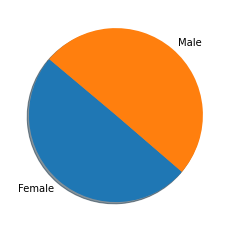

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data_cleaned_by_id = combined_data.drop_duplicates(subset=["Mouse ID"], keep='first', inplace=False)

grouped_by_id = data_cleaned_by_id.groupby(["Sex"])["Sex"].agg(["count"])
grouped_by_id = grouped_by_id.rename(columns={"count":"Total"}).reset_index()

plt.pie(grouped_by_id["Total"].values.tolist(), labels=grouped_by_id["Sex"].values.tolist(), shadow=True, startangle=140)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [2]:
%%latex
$$c = \sqrt{a^2 + b^2}$$

<IPython.core.display.Latex object>